# import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import shap
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv('./global-data-on-sustainable-energy.csv')

# EDA

In [7]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [8]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
df.shape

(3649, 21)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
Entity,3649,176,Afghanistan,21
Density\n(P/Km2),3648,124,25,147


In [12]:
unique_values =  df.nunique()
unique_values

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [14]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

# null vales 

In [15]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

<Axes: >

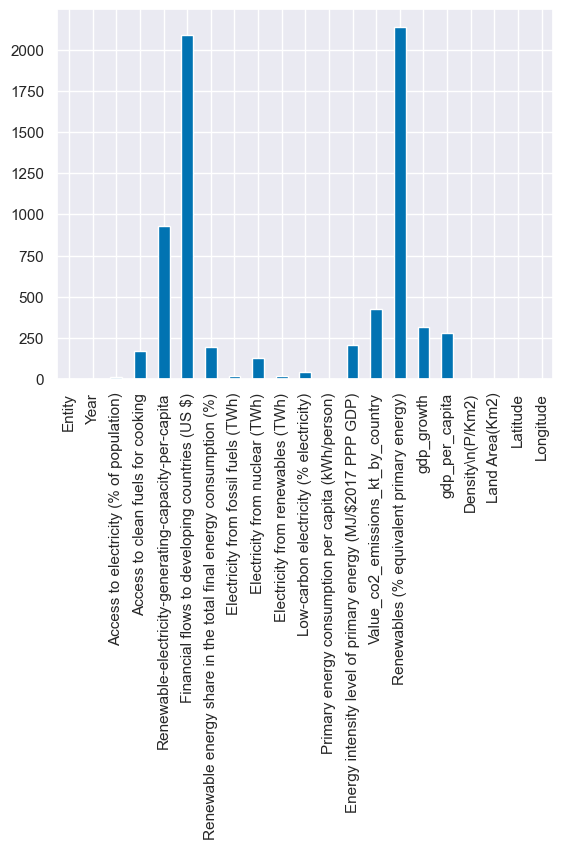

In [16]:
df.isna().sum().plot(kind = 'bar')


# Finding duplicate rows


In [17]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 0


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude


# Getting the CO2 emission values from the 3 biggest countries 

In [18]:
df.rename(columns={"Value_co2_emissions_kt_by_country":"CO2" , 'Land Area(Km2)':'Land'} , inplace=True)


In [22]:
energy_land = df[['Entity', 'Land']]#create new data 
energy_land = energy_land.dropna()
#===========================================
countries = energy_land['Entity'].unique()#take the unique value
#===========================================
land = energy_land['Land'].unique()#take the unique value
land_int = []#use to save new values
for num in land:
    num_str = str(num).replace(',', '')#remove ','
    num_int = int(float(num_str))#convert to float and then to int
    land_int.append(num_int)#append to list
#===========================================
energy_land_data_use_df = pd.DataFrame([countries, land_int], index=['Country', 'Land'])#create dataframe
energy_land_data_use_df = energy_land_data_use_df.T
#===========================================
fig = px.bar(energy_land_data_use_df, x='Country', y='Land', labels={'Land': 'Land Area - km2', 'Entity': 'Country'})#create relation 
# Updates graph layout/styles
fig.update_layout(title={'text': 'Countries Land Area - in km2','x': 0.5,})#for the title
# Shows the graph
fig.show()

In [23]:
energy_co2_data = df[['Entity', 'Year', 'CO2']]#create new data 
energy_co2_data.head()

,Entity,Year,CO2
0,Afghanistan,2000,760.000000
1,Afghanistan,2001,730.000000
2,Afghanistan,2002,1029.999971
3,Afghanistan,2003,1220.000029
4,Afghanistan,2004,1029.999971


In [24]:
# Canada DataFrame with dropped missing values
energy_co2_data_canada = energy_co2_data[(energy_co2_data['Entity'] == 'Canada')].dropna()
# United States DataFrame with dropped missing values
energy_co2_data_united_states = energy_co2_data[(energy_co2_data['Entity'] == 'United States')].dropna()
# China DataFrame with dropped missing values
energy_co2_data_china = energy_co2_data[(energy_co2_data['Entity'] == 'China')].dropna()

In [25]:
# Imports important packages from plotly
from plotly.subplots import make_subplots
# Creates the subplot for the 3 graphs
fig = make_subplots( rows=2, cols=2,specs=[[{}, {}],[{"colspan": 2}, None]],subplot_titles=('Canada', 'United States', 'China'))
# Adds the 3 graphs into the subplot
fig.add_trace( go.Bar(x=energy_co2_data_canada['Year'], y=energy_co2_data_canada['CO2']), row=1, col=1)
fig.add_trace( go.Bar(x=energy_co2_data_united_states['Year'], y=energy_co2_data_united_states['CO2']), row=1, col=2)
fig.add_trace(go.Bar(x=energy_co2_data_china['Year'], y=energy_co2_data_china['CO2']),row=2, col=1)
# Updates subplot layout
fig.update_layout(height=600, width=1000, showlegend=False, title={'text': 'CO2 emission - in kiloton - by the three biggest countries in the world, per year','x': 0.5})
# Shows subplot
fig.show()

In [26]:
#Gets all the years of 2019
energy_co2_data_2019 = energy_co2_data[(energy_co2_data['Year'] == 2019)]
# Drops the missing values
energy_co2_data_2019 = energy_co2_data_2019.dropna()
# Shows it columns
energy_co2_data_2019.columns

Index(['Entity', 'Year', 'CO2'], dtype='object')

In [27]:
# Creates the graph of 2019 CO2 emissions
fig_co2_2019 = px.bar(energy_co2_data_2019, x='Entity', y='CO2')
# Updates graph layout
fig_co2_2019.update_layout(title={'text': 'CO2 emission - in kiloton - by all the countries in the world, per year', 'x': 0.5})
# Shows graph
fig_co2_2019.show()

# MAP SHAPE


In [28]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=False,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()

In [29]:
select_col=df.columns
select_col = ['Access to clean fuels for cooking',
 'Renewable energy share in the total final energy consumption (%)']

In [30]:
for i in select_col:
    column_name = i
    print(column_name)
    plot_world_map(column_name)

Access to clean fuels for cooking


Renewable energy share in the total final energy consumption (%)


# Reduce Unnecessary Columns


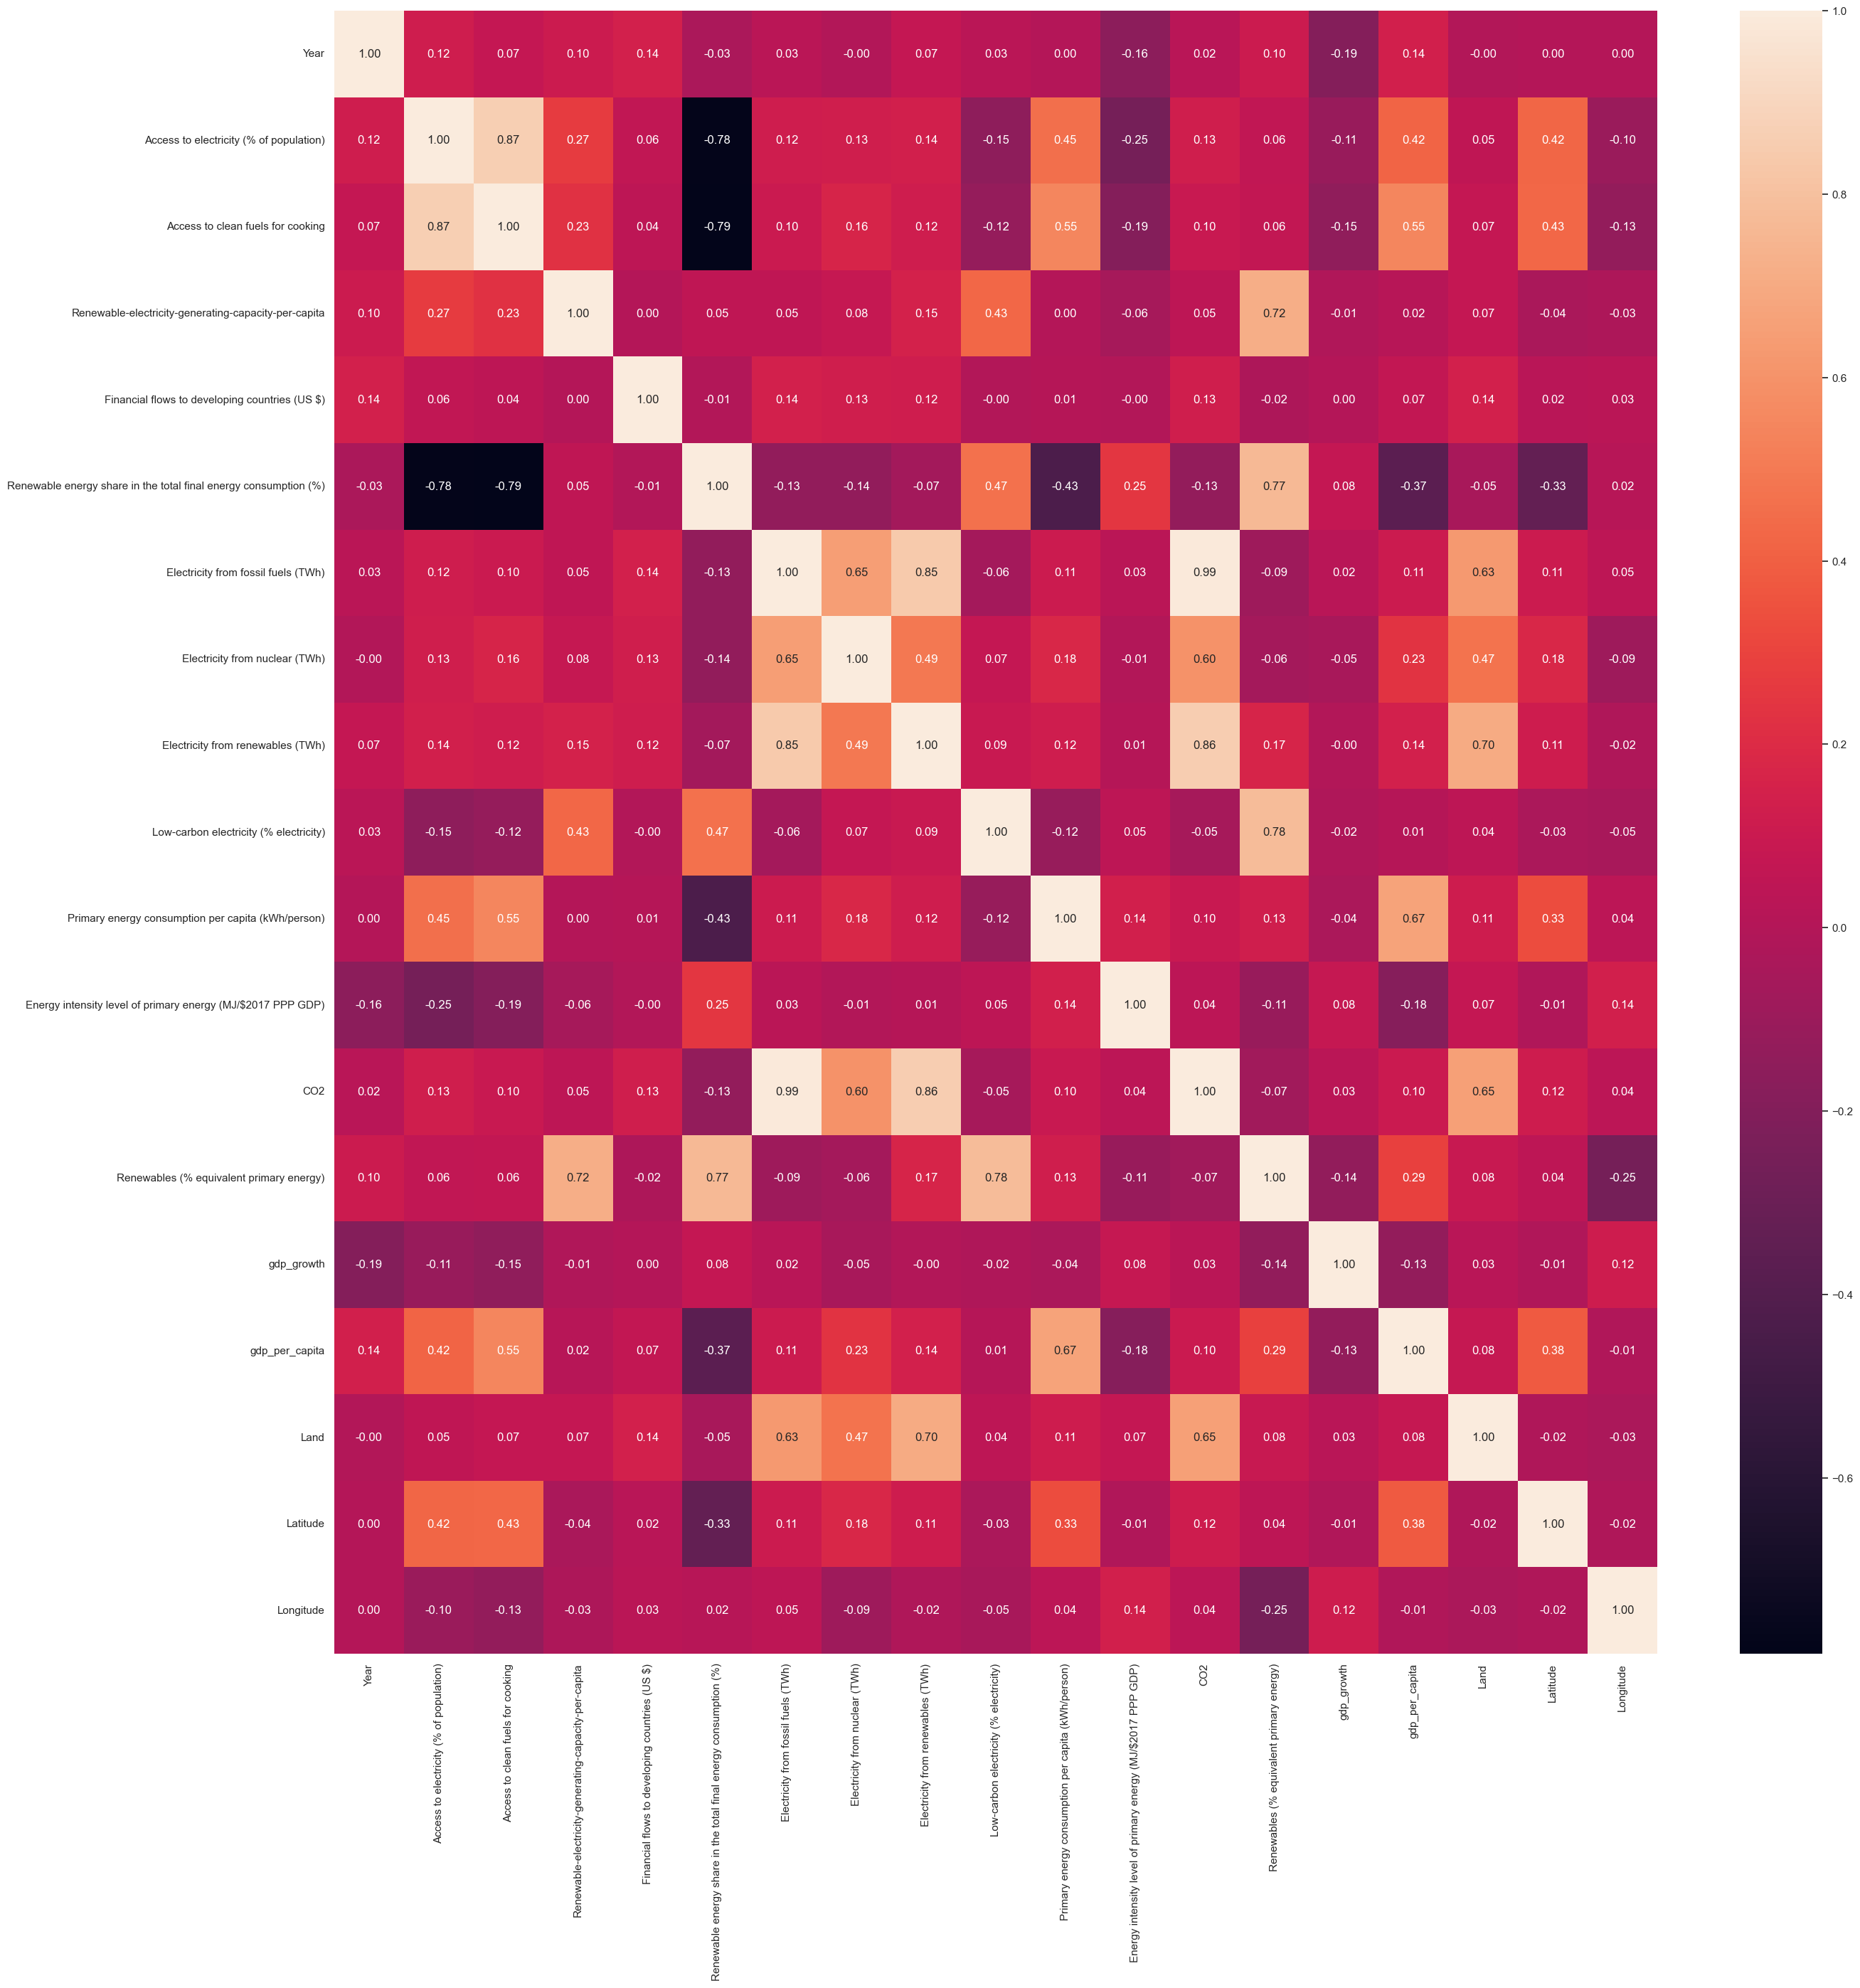

In [33]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[float, int]).columns

plt.figure(figsize=(30,30))
Corr_Matrix=df[numerical_cols].corr()
sns.heatmap(Corr_Matrix, annot=True, fmt=".2f")
plt.show()

In [34]:
print('Top 5 Most Positively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


CO2                                    1.000000
Electricity from fossil fuels (TWh)    0.989741
Electricity from renewables (TWh)      0.856270
Land                                   0.653732
Electricity from nuclear (TWh)         0.598495
Name: CO2, dtype: float64

In [35]:
print('Top 5 Most Negatively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Renewable energy share in the total final energy consumption (%)   -0.132715
Renewables (% equivalent primary energy)                           -0.073735
Low-carbon electricity (% electricity)                             -0.054515
Year                                                                0.024759
gdp_growth                                                          0.031523
Name: CO2, dtype: float64

In [36]:
columns_to_drop = [col for col in Corr_Matrix.columns if abs(Corr_Matrix.loc['CO2', col]) < 0.5]
columns_to_drop

['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Latitude',
 'Longitude']

In [37]:
df = df.drop(columns_to_drop, axis=1)

In [38]:
df=df.dropna()
df.shape

(3101, 7)

# Categorical

In [41]:
df['Land'] = df['Land'].astype(str).str.replace(',', '').astype(float) 


In [42]:
df.rename(columns={'Density\\n(P/Km2)': 'New_Density'}, inplace=True)
df['New_Density'] = df['New_Density'].str.replace(',', '').astype(int)

# visualization

In [43]:
top_10_Value_co2 = df.nlargest(10, 'CO2')
top_10_Value_co2

,Entity,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2,New_Density,Land
733,China,5098.22,348.70,2014.57,1.070722e+07,153,9596960.0
732,China,4990.28,295.00,1835.32,1.050293e+07,153,9596960.0
731,China,4643.10,248.10,1667.06,1.009601e+07,153,9596960.0
728,China,4345.86,133.22,1289.23,1.000667e+07,153,9596960.0
727,China,4203.77,111.50,1093.37,9.984570e+06,153,9596960.0
730,China,4355.00,213.18,1522.79,9.874660e+06,153,9596960.0
729,China,4222.76,171.38,1393.66,9.861100e+06,153,9596960.0
726,China,3869.38,98.32,999.56,9.541870e+06,153,9596960.0
725,China,3811.77,87.20,792.38,9.282550e+06,153,9596960.0
724,China,3326.19,74.74,786.38,8.474920e+06,153,9596960.0


In [44]:
fig1 = px.bar(top_10_Value_co2, x='CO2', y='Entity', orientation='h', text='CO2',
              color='Electricity from nuclear (TWh)', labels={'CO2': 'CO2 (in Entity)'},
              color_continuous_scale='Viridis')  
fig1.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
                    opacity=0.8, textposition='inside')
fig1.update_layout(title_text='Top 10 CO2 value in Entity', yaxis_title='CO2 value',
                   xaxis_title='CO2 (in Entity)', height=500)
fig1.show()

<Axes: xlabel='Electricity from fossil fuels (TWh)'>

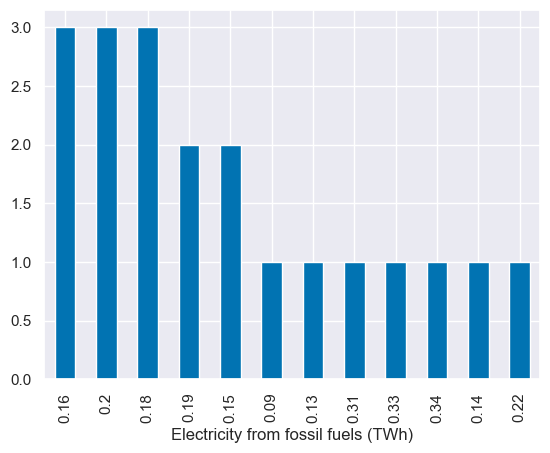

In [45]:
df[df['Entity']=='Afghanistan']["Electricity from fossil fuels (TWh)"].value_counts().plot(kind="bar")

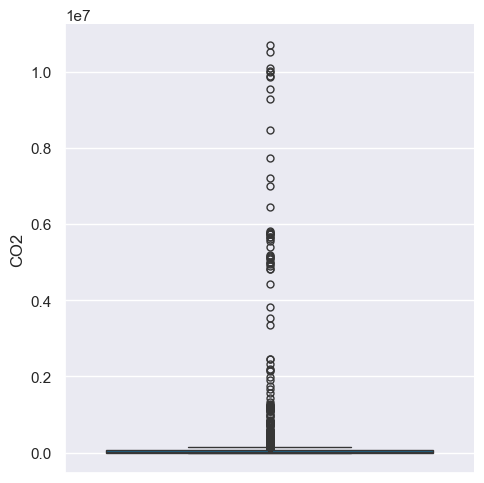

In [46]:
sns.catplot(data=df, y="CO2",  kind="box") 

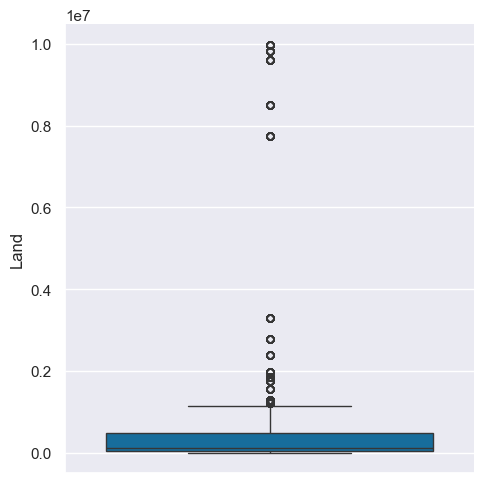

In [47]:
sns.catplot(data=df, y="Land",  kind="box") 

 # Transform columns 

In [48]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df.Entity = le.fit_transform(df.Entity)

# model 

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# CO2 emission values

In [50]:
X = df.drop(columns=['CO2'])
y = df['CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2480, 6)
X_test shape: (621, 6)
y_train shape: (2480,)
y_test shape: (621,)


In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual CO2'] = y_test
    submit['Predict_CO2'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.98
Mean Absolute Error (MAE): 29725.26
Root Mean Squared Error (RMSE): 94307.72
   index     Actual CO2   Predict_CO2
0    826   22879.999160  21418.874921
1   3458  174729.995700  66222.235723
2   3611    2109.999895   4740.572001
3   1872     409.999996  -3055.390651
4   1364     330.000013  -1718.878739
----------------------------------------
Random Forest:
R2 Score: 0.99
Mean Absolute Error (MAE): 8510.70
Root Mean Squared Error (RMSE): 55215.07
   index     Actual CO2    Predict_CO2
0    826   22879.999160   20265.100027
1   3458  174729.995700  181820.500943
2   3611    2109.999895    2050.399951
3   1872     409.999996     426.783337
4   1364     330.000013     332.254993
----------------------------------------
Gradient Boosting:
R2 Score: 1.00
Mean Absolute Error (MAE): 9900.17
Root Mean Squared Error (RMSE): 36914.62
   index     Actual CO2    Predict_CO2
0    826   22879.999160   22314.967528
1   3458  174729.995700  237262.046895
2   3611    

Electricity from fossil fuels (TWh): 0.94
Electricity from renewables (TWh): 0.04
Land: 0.01
Electricity from nuclear (TWh): 0.00
New_Density: 0.00
Entity: 0.00


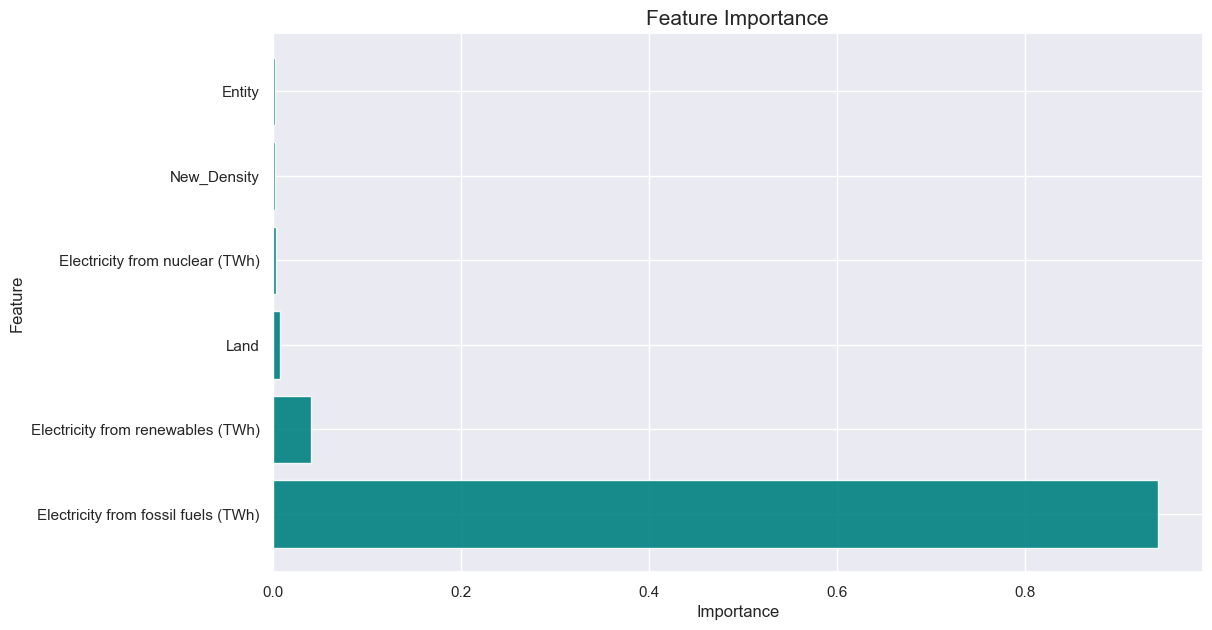

In [52]:
importances = model.feature_importances_

feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importance), alpha=0.9, color='teal')
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# forward_selection

In [54]:
!pip install statsmodels

  Using cached statsmodels-0.14.0-cp310-cp310-macosx_11_0_arm64.whl (9.4 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [55]:
import statsmodels.api as sm

X = df.drop(columns=['CO2'])
y = df['CO2']

def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Assuming you have already defined X and y as the features and target variable respectively
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Land', 'Electricity from renewables (TWh)', 'Entity', 'New_Density']


# Electricity from fossil fuels (TWh)

In [56]:
X = df.drop(columns=['Electricity from fossil fuels (TWh)'])
y = df['Electricity from fossil fuels (TWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2480, 6)
X_test shape: (621, 6)
y_train shape: (2480,)
y_test shape: (621,)


In [58]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Electricity'] = y_test
    submit['Predict_Electricity'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.98
Mean Absolute Error (MAE): 16.09
Root Mean Squared Error (RMSE): 44.91
   index  Actual Electricity  Predict_Electricity
0    826                7.80             7.208668
1   3458               57.79           111.294498
2   3611                0.07             0.918453
3   1872                0.00             0.748645
4   1364                0.21             0.167617
----------------------------------------
Random Forest:
R2 Score: 1.00
Mean Absolute Error (MAE): 4.21
Root Mean Squared Error (RMSE): 21.45
   index  Actual Electricity  Predict_Electricity
0    826                7.80             10.60630
1   3458               57.79             65.82110
2   3611                0.07              0.07770
3   1872                0.00              0.01510
4   1364                0.21              0.19903
----------------------------------------
Gradient Boosting:
R2 Score: 1.00
Mean Absolute Error (MAE): 5.95
Root Mean Squared Error (RMSE): 20.79
   index 